# MNIST

# Libraries:

In [1]:
from scipy import io
from sklearn.model_selection import train_test_split
from pycaret.classification import *

import pandas as pd

# Importing Data:

Donwload link:

raw=true is important so you download the file rather than the webpage.

https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat?raw=true

In [2]:
# Load the data

data = io.loadmat('mnist-original.mat')

# General Analysis:

In [3]:
type(data)

dict

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])

In [5]:
data['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
data['label']

array([[0., 0., 0., ..., 9., 9., 9.]])

In [7]:
df = pd.DataFrame(data['data']).transpose()
results = pd.DataFrame(data['label']).transpose()

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
results

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
69995,9.0
69996,9.0
69997,9.0
69998,9.0


In [10]:
df['results'] = results 

# Modeling:

In [11]:
# Creating the setup

exp_clf1 = setup(data = df, target = 'results')

,Description,Value
0,Session id,5672
1,Target,results
2,Target type,Multiclass
3,Original data shape,"(70000, 785)"
4,Transformed data shape,"(70000, 711)"
5,Transformed train set shape,"(48999, 711)"
6,Transformed test set shape,"(21001, 711)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


In [12]:
%%time

# Comparing models

best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9749,0.9994,0.9749,0.9749,0.9749,0.9721,0.9721,95.6840
xgboost,Extreme Gradient Boosting,0.9743,0.9994,0.9743,0.9744,0.9743,0.9715,0.9715,940.8380
et,Extra Trees Classifier,0.9684,0.9990,0.9684,0.9684,0.9684,0.9649,0.9649,26.1880
knn,K Neighbors Classifier,0.9673,0.9951,0.9673,0.9676,0.9673,0.9637,0.9637,106.5740
rf,Random Forest Classifier,0.9647,0.9988,0.9647,0.9647,0.9647,0.9608,0.9608,28.8400
gbc,Gradient Boosting Classifier,0.9441,0.9973,0.9441,0.9442,0.9441,0.9379,0.9379,1152.4340
lr,Logistic Regression,0.9057,0.9905,0.9057,0.9055,0.9055,0.8952,0.8952,206.5040
svm,SVM - Linear Kernel,0.8748,0.0000,0.8748,0.8833,0.8751,0.8609,0.8618,87.0240
lda,Linear Discriminant Analysis,0.8657,0.9851,0.8657,0.8674,0.8656,0.8507,0.8510,24.0160
dt,Decision Tree Classifier,0.8621,0.9235,0.8621,0.8619,0.8619,0.8467,0.8467,16.4860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 2h 43min 19s, sys: 53min 24s, total: 3h 36min 43s
Wall time: 3h 52min 29s


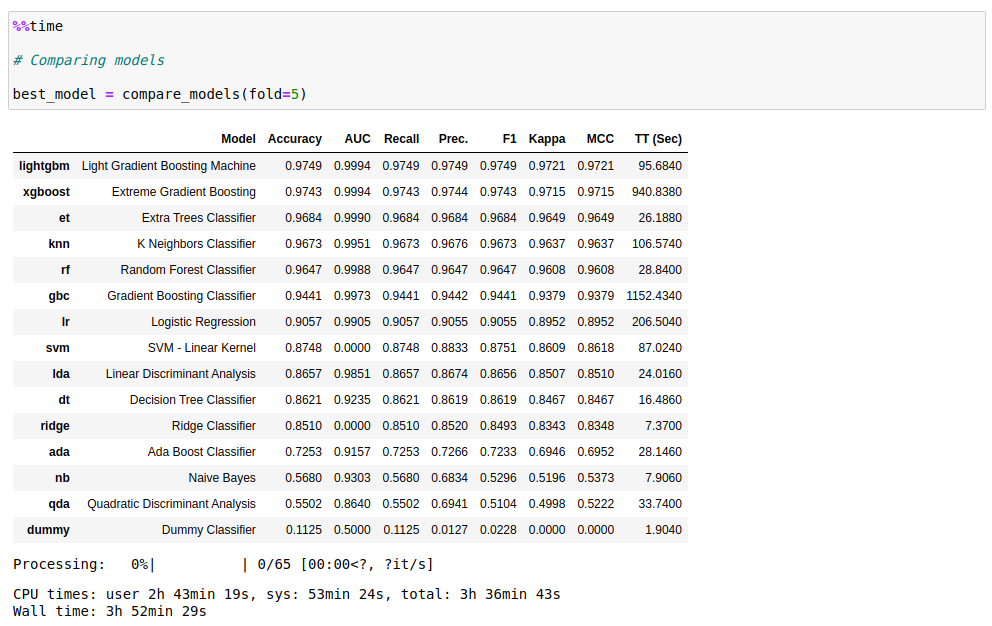

In [13]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2400, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
%%time

model = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9754,0.9994,0.9754,0.9754,0.9754,0.9727,0.9727
1,0.9758,0.9995,0.9758,0.9759,0.9758,0.9731,0.9731
2,0.9743,0.9995,0.9743,0.9743,0.9743,0.9714,0.9714
3,0.9740,0.9994,0.9740,0.9740,0.9740,0.9711,0.9711
4,0.9731,0.9994,0.9731,0.9731,0.9731,0.9701,0.9701
Mean,0.9745,0.9994,0.9745,0.9745,0.9745,0.9717,0.9717
Std,0.0010,0.0001,0.0010,0.0010,0.0010,0.0011,0.0011


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 6min 48s, sys: 2min 39s, total: 9min 28s
Wall time: 10min 26s


In [13]:
%%time

tuned_model = tune_model(model, fold=5, n_iter=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9674,0.9991,0.9674,0.9675,0.9674,0.9638,0.9638
1,0.9672,0.9991,0.9672,0.9673,0.9672,0.9636,0.9636
2,0.9677,0.9991,0.9677,0.9677,0.9676,0.9640,0.9641
3,0.9665,0.9989,0.9665,0.9665,0.9665,0.9628,0.9628
4,0.9659,0.9990,0.9659,0.9659,0.9659,0.9621,0.9621
Mean,0.9670,0.9991,0.9670,0.9670,0.9669,0.9633,0.9633
Std,0.0006,0.0001,0.0006,0.0006,0.0006,0.0007,0.0007


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

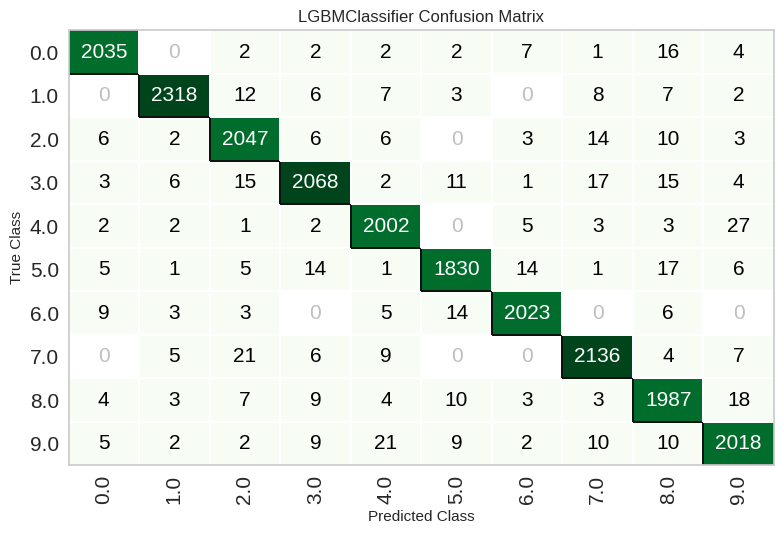

CPU times: user 3.01 s, sys: 10.6 s, total: 13.6 s
Wall time: 30.5 s


In [14]:
%%time

plot_model(tuned_model, plot = 'confusion_matrix')

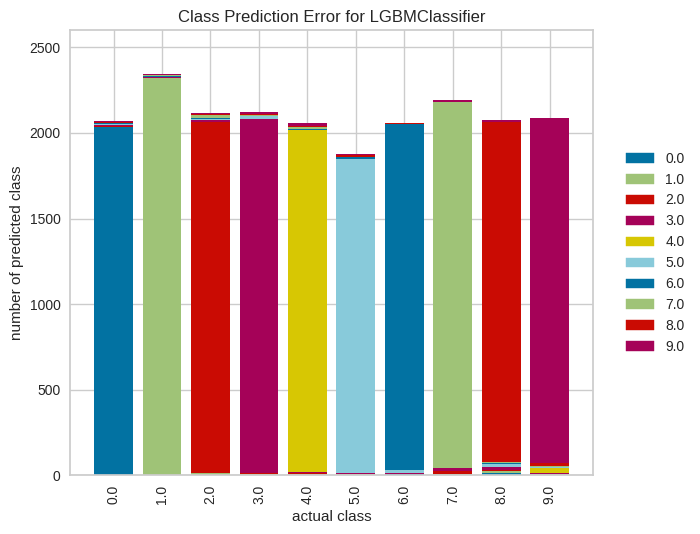

CPU times: user 5.95 s, sys: 3.4 s, total: 9.35 s
Wall time: 10.9 s


In [15]:
%%time

plot_model(tuned_model, plot = 'error')

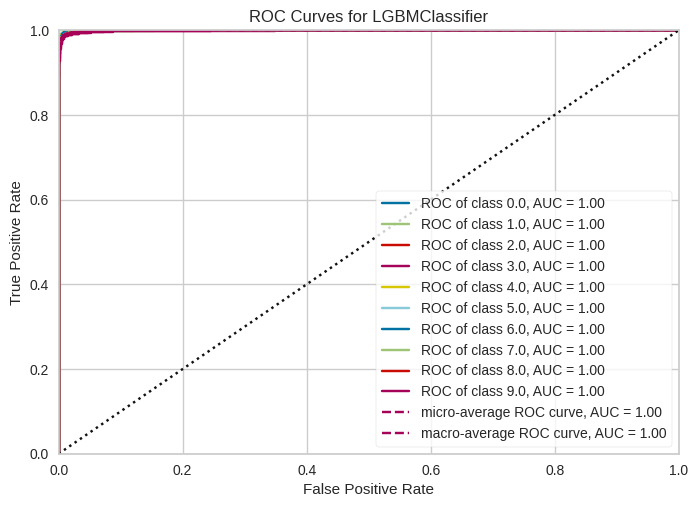

CPU times: user 5.68 s, sys: 3.27 s, total: 8.95 s
Wall time: 10.4 s


In [16]:
%%time

plot_model(tuned_model, plot = 'auc')

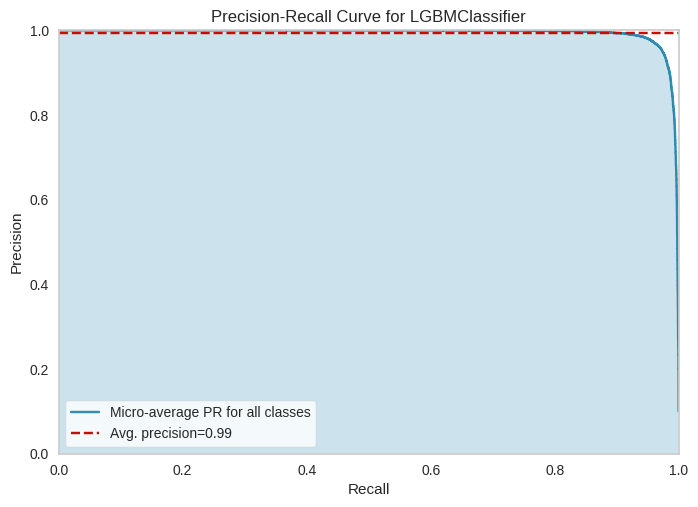

CPU times: user 1min 52s, sys: 35 s, total: 2min 27s
Wall time: 2min 41s


In [17]:
%%time

plot_model(tuned_model, plot = 'pr')

In [18]:
%%time

predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9744,0.9994,0.9744,0.9745,0.9744,0.9716,0.9716


CPU times: user 2.94 s, sys: 986 ms, total: 3.93 s
Wall time: 4.34 s


,12,13,14,15,33,34,35,36,37,38,...,773,774,775,776,777,778,779,results,prediction_label,prediction_score
48999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4,0.9957
49000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2,0.9999
49001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0000
49002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9,0.9789
49003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5,0.9424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7,0.9961
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9,0.9806
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7,0.9999
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8,0.9998
